 Final Project Submission

Please fill out:
* Student name: Kieu Cheung
* Student pace: full time
* Scheduled project review date/time: 7/31/2020 at 10:30 PST
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://kieuha.github.io/formatted_like_this


# Loading King Country Housing Data with Pandas

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import stat 
import math
import seaborn as sns

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("kc_house_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Checking for Duplications and Missing Data

In [8]:
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


In [9]:
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


In [10]:
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [11]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')
    

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
for col in df.columns:
    print(col, "\n", df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

# Exporatory Data Analysis (EDA)

Note: There are about 21597 values for each row.
Missing data: waterfront (11%) and year renovated (18%)

## Scatter Plots

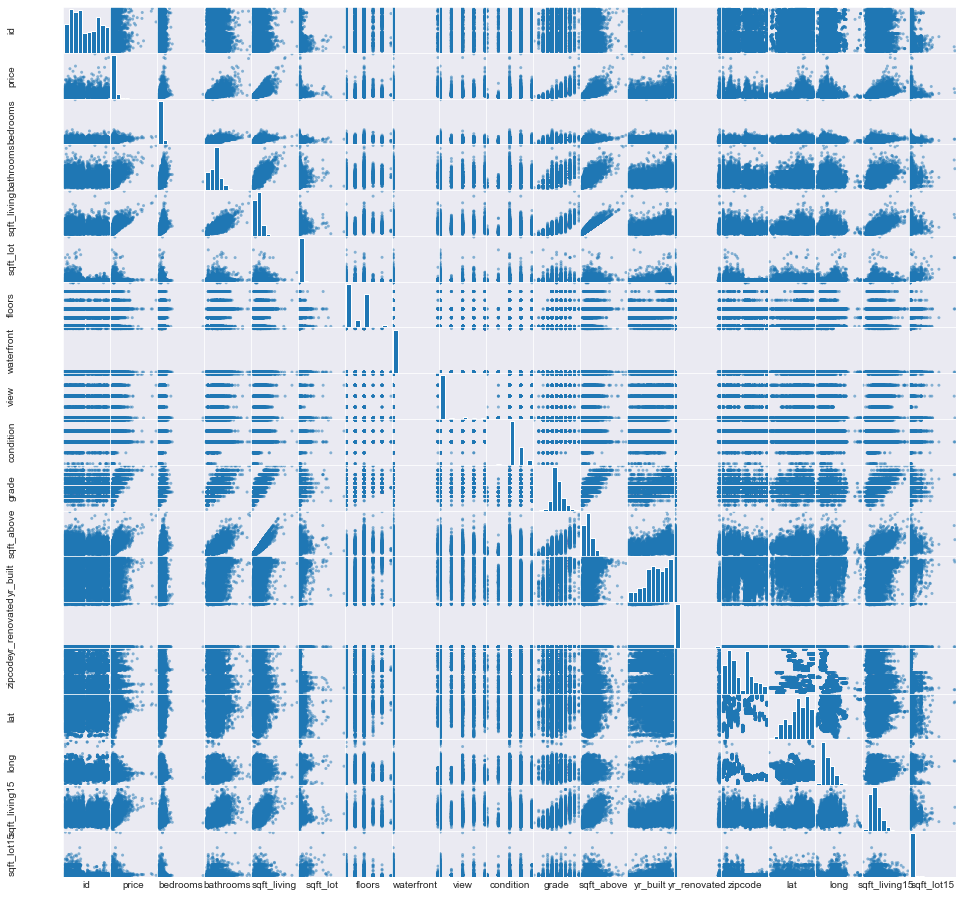

In [14]:
    #Scatter Plot with y rotated 90 degree
s = pd.plotting.scatter_matrix(df,figsize  = [16, 16]);


#     [s.xaxis.label.set_rotation(90) for s in scatter.reshape(-1)]
#     [s.yaxis.label.set_rotation(0) for s in scatter.reshape(-1)]

    #Offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in s.reshape(-1)]

    #Hide all ticks


[s.set_xticks(()) for s in s.reshape(-1)]
[s.set_yticks(()) for s in s.reshape(-1)]

plt.show()

## Joint Plots

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


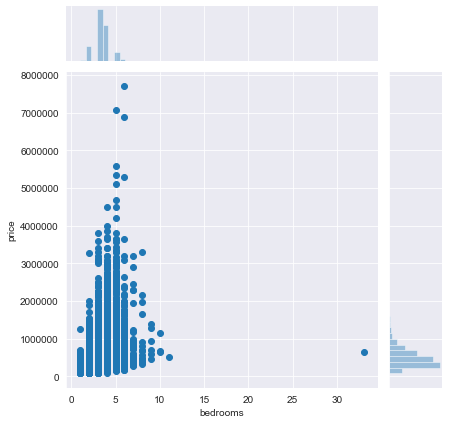

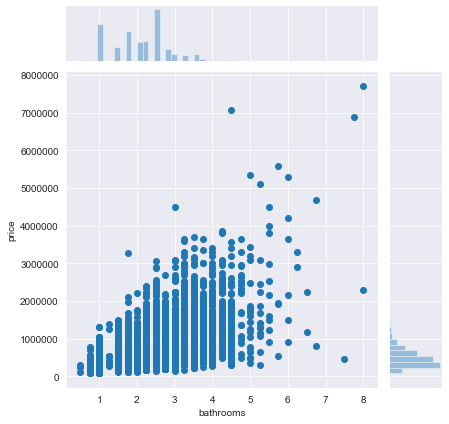

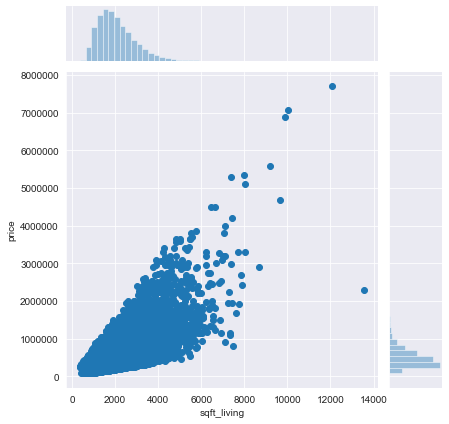

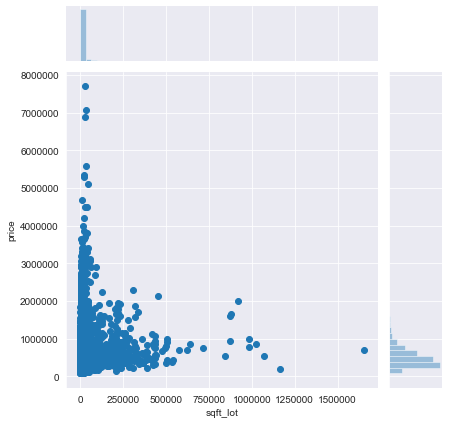

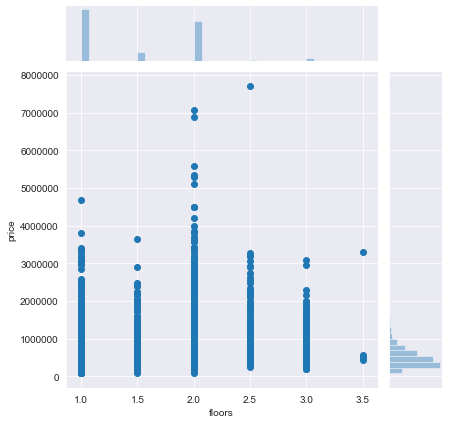

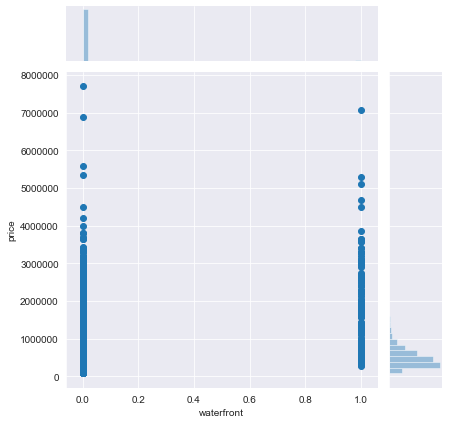

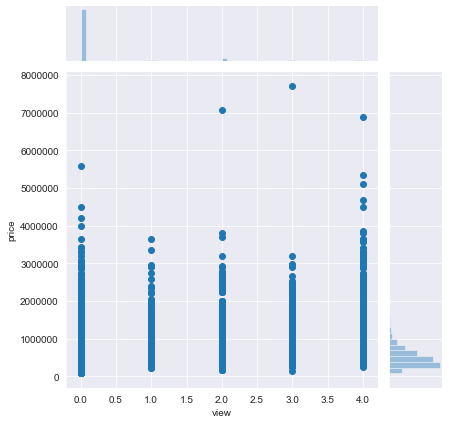

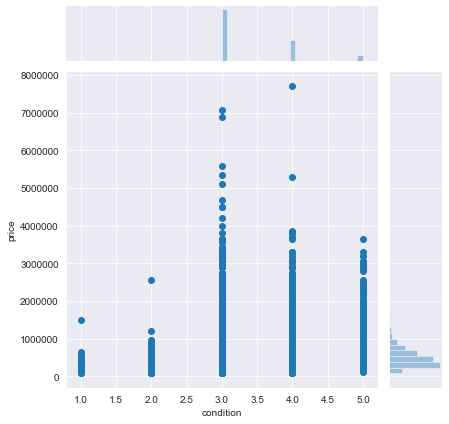

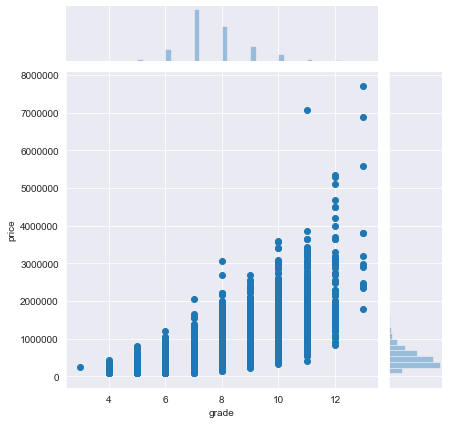

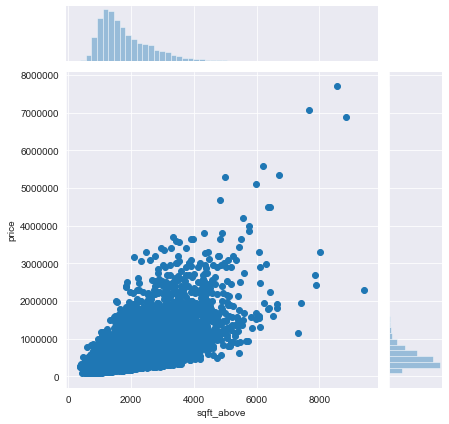

In [16]:
plotfeats = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
               "floors", "waterfront", "view", "condition", 
               "grade", "sqft_above"]
for col in plotfeats: 
    sns.jointplot(x=col, y='price', data=df)

## Correlation beteween Price and Other Attributes via Distribution Plots and Heat Map

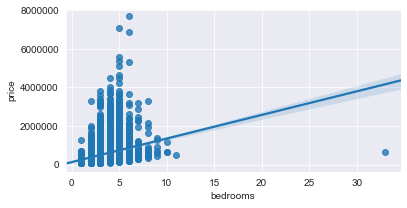

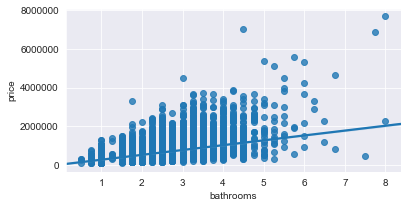

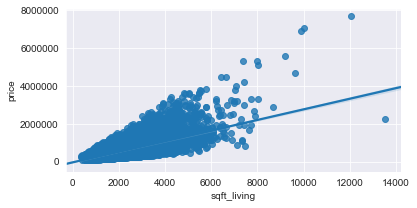

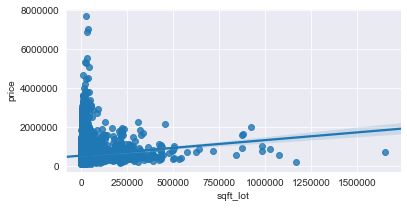

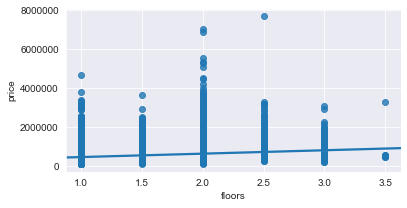

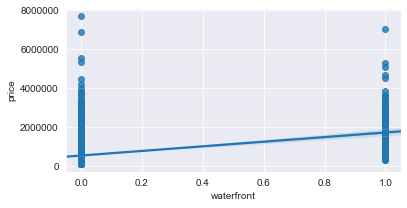

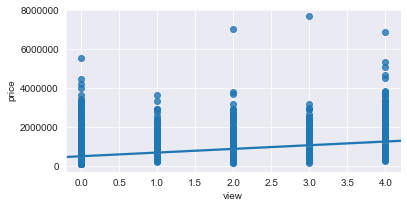

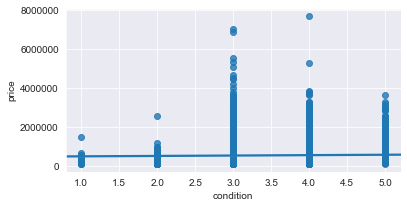

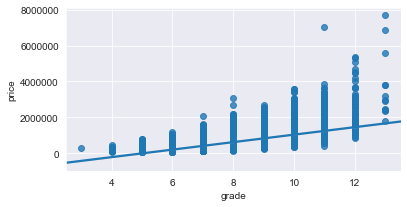

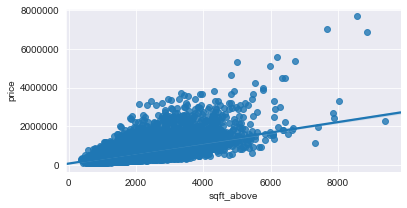

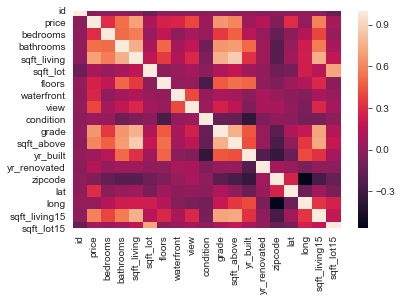

In [17]:
#Quick check, are there numerical relationships we can spot among the numerical data

plotfeats= ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
               "floors", "waterfront", "view", "condition", 
               "grade", "sqft_above"]
for f in plotfeats:
    #ax = plt.gca()
    ax=plt.subplots(figsize=(6,3))
    ax=sns.regplot(x=df[f], y=df['price'])
    plt.show()

sns.heatmap(df.corr())

## Skew of Attribute Distribution

Positive and negative skew can be observed. The closer the value is to 0, the less the data is skewed

Sqft_lot (or sqft_lot15) and Waterfront have the most uneven data distribution. There are houses with very big lot and sq ft living

id                0.243226
price             4.023365
bedrooms          2.023641
bathrooms         0.519709
sqft_living       1.473215
sqft_lot         13.072604
floors            0.614497
waterfront       11.343651
view              3.399526
condition         1.036037
grade             0.788237
sqft_above        1.447434
sqft_basement     1.574330
yr_built         -0.469450
yr_renovated      4.573385
zipcode           0.405322
lat              -0.485522
long              0.884888
sqft_living15     1.106875
sqft_lot15        9.524362
dtype: float64


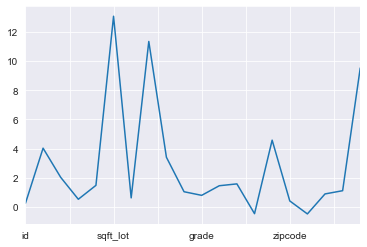

In [88]:
skew = (df.skew())
print(skew)
skew.plot()

## Violin Plots for Applied Features

Violin plots to show the summary statistics of mean, median and distribution of the data

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


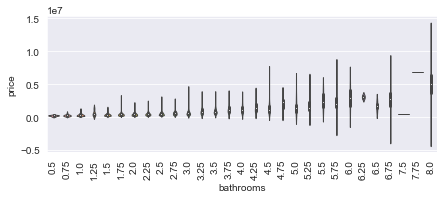

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


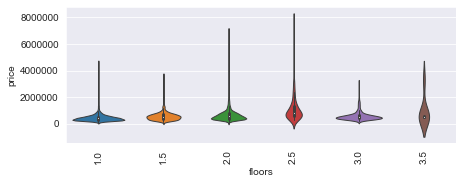

waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64


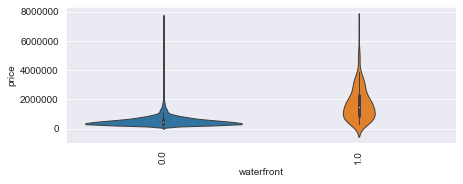

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


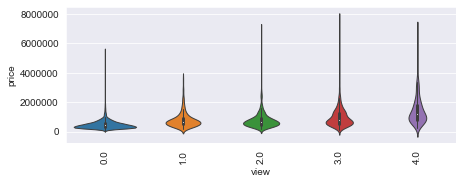

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


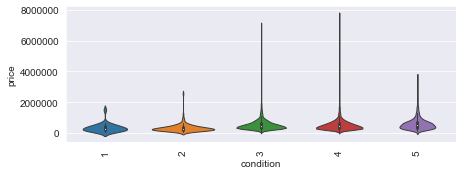

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


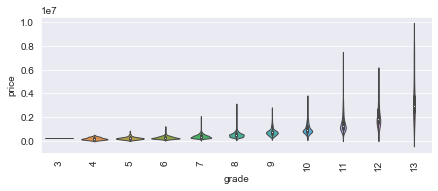

In [20]:
plotfeats= ["bedrooms", "bathrooms", 
               "floors", "waterfront", "view", "condition", 
               "grade"]


catdata=df.loc[:, plotfeats]
cat_values={}
for n in plotfeats[1:len(plotfeats)]:
    print(n)
    print(pd.value_counts(catdata[n]))
    ax = plt.subplots(figsize=(7, 2.5))
    plt.xticks(rotation='vertical')
    ax=sns.violinplot(x=n, y="price", data=df, linewidth=1)
    plt.show()

## Price vs House Features  Bar Graphs
Exploring data by graphing all features vs price to see the relationship between price and each feature

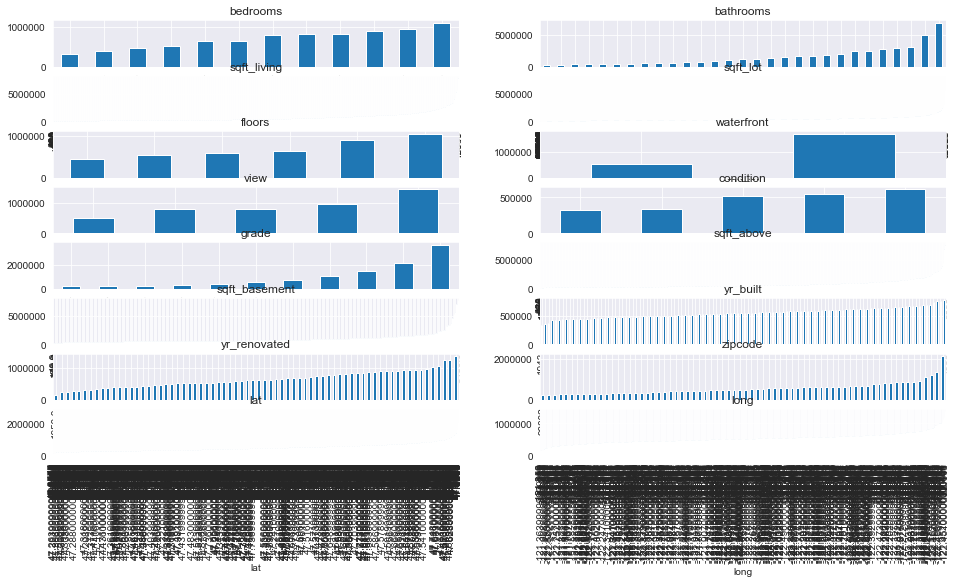

In [21]:
CategoryAll = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", \
"floors", "waterfront", "view", "condition", "grade", "sqft_above", \
"sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long",\
"sqft_living15", "sqft_lot15"]
fig, axes = plt.subplots(nrows=8,ncols=2, figsize=(16,8))

for col, ax in zip(CategoryAll, axes.flatten()):
    (df.groupby(col).mean()["price"].sort_values().plot.bar(ax=ax))
    ax.set_title(col)
fig.tight_layout()

Interpretation of the data:
    The data needs to be cleaned before further data exploration can be done. 
    1. price, sq ft living, sq ft above, sq ft lot, sq ft basement, yr built can be converted to category instead of a list of numbers.

Positive and negative skew can be observed. Closer the value is to 0, the less skew it is.

In [22]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

## Unique Values
There are many features. Explore the data by looking and unique values to assest what contains in each feature. 

In [23]:
df.nunique(axis = 0, dropna = True)

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [24]:
category_unique=df.loc[:,((df.dtypes != 'object')&(df.nunique()>20))]

In [25]:
category_unique.head(5)

,id,price,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,1.00,1180,5650,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,2.25,2570,7242,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,1.00,770,10000,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,3.00,1960,5000,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,2.00,1680,8080,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [26]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df, columns=['zipcode'])

Create Plot for Unique values

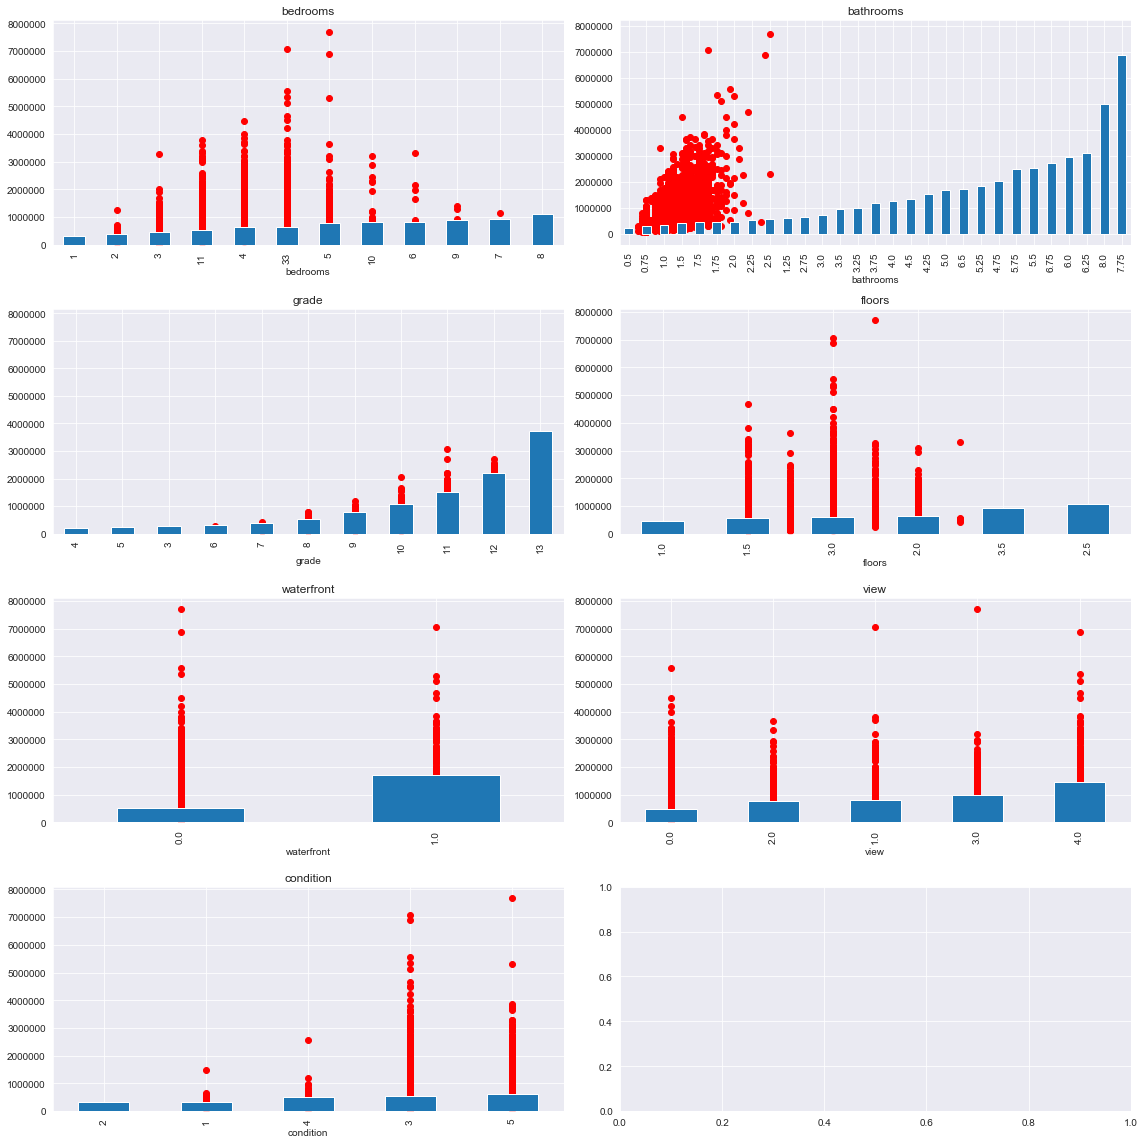

In [27]:

fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(16,16))
categorical_columns = ["bedrooms", "bathrooms", "grade", "floors", "waterfront", "view", "condition"]
for col, ax in zip(categorical_columns, axes.flatten()):
    dg = df[['price', col]]
    (dg.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax))
    ax.scatter(x=df[col], y=df['price'], color='red')
    ax.set_title(col)
fig.tight_layout()
plt.show()

## Create Bar Plots for Selected Category

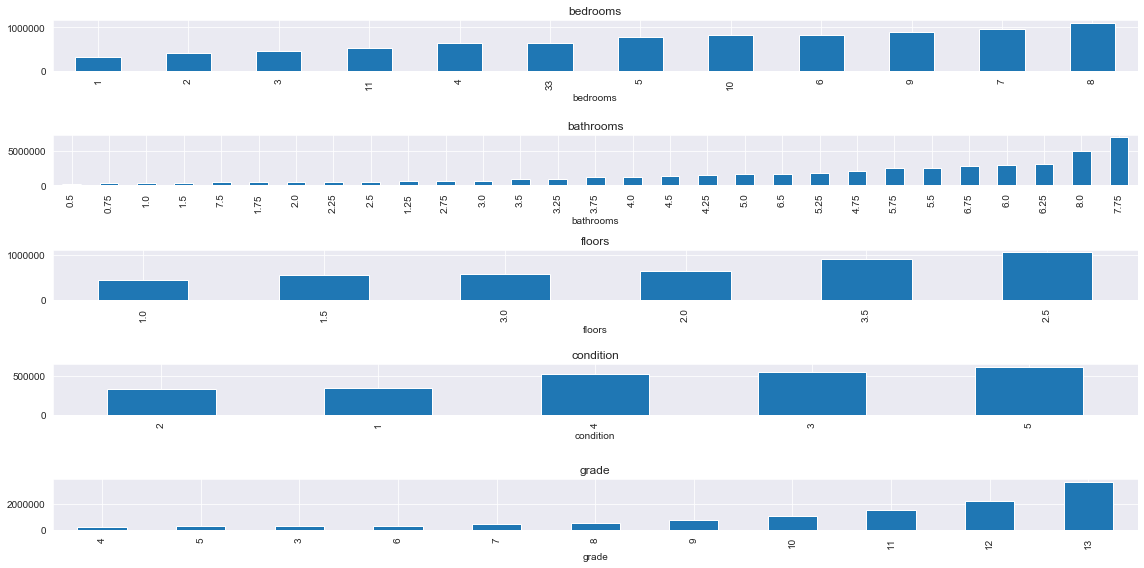

In [28]:
fig, axes = plt.subplots(nrows=5,ncols=1, figsize=(16,8))
Category = ["bedrooms", "bathrooms", "floors", "condition", "grade"]

for col, ax in zip(Category, axes.flatten()):
    (df.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax))
    ax.set_title(col)
fig.tight_layout()

Data does not seem to make sense for bathroom such as 0.75, 1.75, 2.75 ... for bathrooms. For this project, the data is left as is. 

In [29]:
data_pred = df.iloc[:,1:21]
data_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning 

### Check for Null values

In [30]:
# The column sqft_basement has question marks in it. I'm replacing them with
# np.nan, so that I can use the code below to replace the nan with the mean.
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].astype(np.float64)

In [31]:
def AreThereNullValues(df):
    print("Null values in the data?",df.isnull().values.any())
    print("How many?", df.isnull().sum().sum())
    
AreThereNullValues(df)

Null values in the data? True
How many? 6735


### Check for Columns with NaN values

In [32]:
def ColumnsWithNan(df):
    nan_values = df.isna()
    nan_columns = nan_values.any()
    return df.columns[nan_columns].tolist()

print("Columns with NaN:", ColumnsWithNan(df))

Columns with NaN: ['waterfront', 'view', 'sqft_basement', 'yr_renovated']


### Replace NaN with the mean

In [33]:
dfno_na = df.copy().dropna()
new_df = df.copy()
columns_with_nan = ColumnsWithNan(new_df)
#### Get means
dfno_na_means = dfno_na[columns_with_nan].mean()
dfno_na_means

for col in columns_with_nan:
    new_df[col] = new_df[col].fillna(dfno_na_means[col])
    
new_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [34]:
AreThereNullValues(new_df)

Null values in the data? False
How many? 0


### Convert Data Type from Floats to Integers

In [35]:

#new_df["id"].astype(int)
new_df["price"].astype(np.float64)
new_df["bedrooms"].astype(np.float64)
new_df["bathrooms"].astype(np.float64)
new_df["floors"].astype(np.float64)
new_df["waterfront"].astype(np.float64)
new_df["view"].astype(np.float64)
new_df["condition"].astype(np.float64)
new_df["grade"].astype(np.float64)
new_df["yr_built"].astype(int)
new_df['yr_renovated'].astype(int)
new_df["lat"].astype(int)
new_df["long"].astype(int)
new_df["date"].dtype
new_df["sqft_basement"].astype(np.float64)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Drop outliers for values > z_score with threadhold of 3

In [36]:
columns = new_df.columns.tolist()
for value in ["date", "id", "yr_built", "lat", "long", "yr_renovated", \
              "zipcode", "price", "view", "waterfront"]:
    columns.remove(value)

threshold = 3
df__ = new_df.copy()
df_ = df__[columns]
mean = np.mean(df_)
stdev = np.std(df_)
z_scores_abs = np.abs((df_ - mean)/stdev)
for col in columns:
   df__[col] = df__[col][z_scores_abs[col]<=3]

df__=df__.dropna()
AreThereNullValues(df__)

len(new_df), len(df__)

Null values in the data? False
How many? 0


(21597, 20357)

In [37]:
def remove_outliers(df, columns, threshold=3):
    """Removes rows of data in df whenever a zscore within that row is more 
       than `threshold`(default 3)"""
    threshold = 3
    dg = df.copy()
    df_ = dg[columns]
    mean = np.mean(df_)
    stdev = np.std(df_)
    z_scores_abs = np.abs((df_ - mean)/stdev)
    for col in columns:
        df_[col] = df_[col][z_scores_abs[col]<=3]
        df_ = df_[z_scores_abs < threshold]
    return dg.dropna()


In [38]:
columns = new_df.columns.tolist()
for value in ["date", "id", "yr_built", "lat", "long", "yr_renovated", \
              "zipcode", "price", "view", "waterfront"]:
    columns.remove(value)
print(columns)
new_df_no_outliers = new_df.copy()

new_df_no_outliers = remove_outliers(new_df_no_outliers, columns)

new_df_no_outliers.info()


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqf

## Create Dummy Variables

### Dummies for df

In [39]:
df_dummies = new_df_no_outliers.copy()
df_dummies.head()

#Create dummies for zipcode
df_dummies = pd.get_dummies(df_dummies, columns=['zipcode'])

### Set Continous and Categorical 

In [40]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_lot15']
categoricals = ['floors', 'waterfront', 'view', 'condition', 'grade']

# Build Regression Model to Predict Prices with All the Data

## Linear Regression with Statsmodel

In [41]:
# Using statsmodel data with NA removed

import statsmodels.api as sm

removefeats= ["price", "date", "grade", "lat", "long", "sqft_above", "sqft_basement", 'sqft_living15', 'sqft_lot15']
X = df_dummies.drop(removefeats, axis=1)
y = df_dummies['price']

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit_regularized(alpha=2000)
model.params

const            4.488385e+05
id              -2.617426e-07
bedrooms        -3.710439e+04
bathrooms        5.211065e+04
sqft_living      2.563296e+02
                     ...     
zipcode_98177    0.000000e+00
zipcode_98178    0.000000e+00
zipcode_98188    0.000000e+00
zipcode_98198   -8.607757e+03
zipcode_98199    6.738997e+04
Length: 82, dtype: float64

## Linear Regression with SK Learn

In [42]:
import sklearn
from sklearn import datasets, linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import Image, HTML

In [43]:
df_dummies['year_sold'] = pd.to_datetime(df_dummies['date'], format="%m/%d/%Y").dt.year
df_dummies['sqrt_price'] = np.sqrt(df_dummies['price'])
df_dummies['log_price'] = np.log(df_dummies['price'])
df_dummies['cube_root_price'] = (df_dummies['price'])**(1./3)
df_dummies.corr()['price'].head(20)

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264119
view             0.393744
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.322192
yr_built         0.053953
yr_renovated     0.118129
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
zipcode_98001   -0.091959
Name: price, dtype: float64

*** NOTE: Model testing with all data***

Index(['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zip

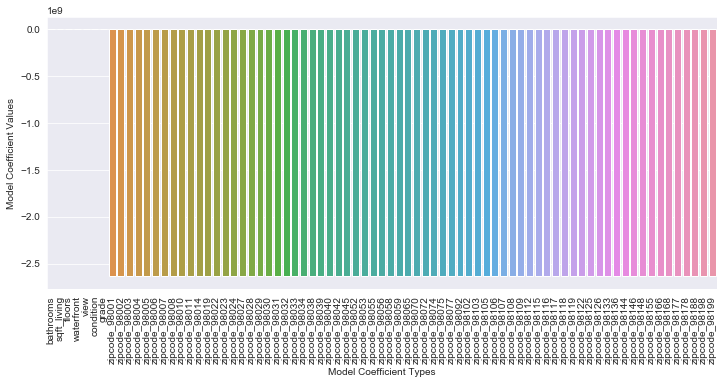

R squared:  0.8748736747687718
Average Coefficients:  2397100247.47077
Root Mean Squared Error:  5.140797110458601


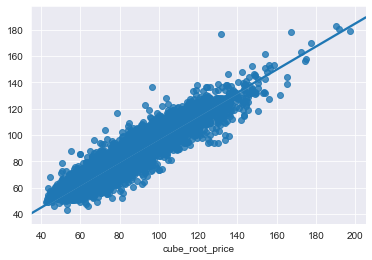

In [44]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',\
'sqft_above', 'yr_built', 'lat', 'long', 'sqft_lot15']
categoricals = ['floors', 'waterfront', 'view', 'condition', 'grade']

df_fit = df_dummies 

removefeats = [
 'id',
 'date',
 'bedrooms',
 'price',
 'log_price',
 'sqrt_price',
 'cube_root_price',
 #'bathrooms',
 #'floors',
 'sqft_lot',
 #'condition',
 'sqft_above',
 'sqft_basement',
 #'grade',
 'yr_built',
 'year_sold',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
              ]
X = df_fit.drop(removefeats, axis=1)
print(X.columns)
y_label = 'cube_root_price'
y = df_fit[y_label] #df_fit['price']
lr = linear_model.LinearRegression()
lr_model = lr.fit(X, y)
y_predict = lr_model.predict(X)
lr_r2 =  r2_score(y, y_predict)
bx=plt.subplots(figsize=(12,5))
bx= sns.barplot(x=0, y=1, data=pd.DataFrame(zip(X.columns, lr_model.coef_)))
plt.xticks(rotation='vertical')
plt.xlabel("Model Coefficient Types")
plt.ylabel("Model Coefficient Values")
plt.show()
y_pred = lr_model.predict(X)
print ("R squared: ", (lr_r2))
print ("Average Coefficients: ", (abs(lr_model.coef_).mean()))
print ("Root Mean Squared Error: ", sqrt(mean_squared_error(y, y_pred)))

ax = sns.regplot(y, y_pred)
    
plt.show()

Recall that R squared represnts the goodness-of-fit statistics. The relationship between price (x) and dependent variables (y) is measured by how close the data are to the fitted regression line. Overall, x and y has an 87.5% correlation.

# Train and Validate Model

In machine learning, one common issue that many people face when designing a prediction model is over and under fitting. In over fitting, the model looks great for training data. However, it does not perform well in real life data. In under fitting, the model does not fully use the data to create the prediction model. In either cases, the model does not provide good predictions on new data. Training and validation allows one to gain perspective on how to model potentially performs on new data. 

Typical training and testing percent seltions are 80%/20% or 67%/33%. For this project, I go with the later.

## Setup Train-Test Data Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=40)
print(len(X_train), len(y_train), len(y_test), len(X_test))

14469 14469 7128 7128


In [47]:
X_train

,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
19057,2.50,2650,1.0,0.000000,0.0,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8785,1.50,1540,2.0,0.000000,0.0,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8174,1.75,1270,1.5,0.000000,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845,3.50,3010,2.0,0.000000,0.0,3,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8451,1.75,1010,1.0,0.000000,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,1.75,2500,1.0,0.000000,0.0,4,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16065,2.50,2960,2.0,0.007518,0.0,3,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14501,1.00,1270,1.0,0.000000,0.0,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14555,1.00,1400,1.5,0.000000,0.0,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and Predict

### Fit the Model

In [48]:
#fit a model: X_train, X_test, y_train, y_test

lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

### Calculate Predictions on Training and Test Sets

In [49]:
y_hat_train = lr_model.predict(X_train)
y_hat_test = lr_model.predict(X_test)

### Calculate Training and Test Residuals

In [50]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### Calculate the Mean Square Error (MSE)

In [51]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print ("Average Coefficients: ", (abs(lr_model.coef_).mean()))

Train Mean Squared Error: 26.64815293423577
Test Mean Squared Error: 26.15409936319339
Average Coefficients:  2611596384.7960644


As shown above, the mean square errors for train and test data are very similiar. This is an indication that there is no difference between the training and testing results. 

## Cross-Validation

Cross validation is a useful method to validate the results above as data may present an inherent amount of bias. Funtion kfolds() is used to split data into two equal sizes. The training set is randomly split into k smaller sets (k = 5 for this validation). The model is train using 4 sets and 1 set is used for testing.

In [52]:
data = df_dummies 

In [53]:
def kfolds(data, k):
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observation//k
    leftovers = num_observations%k
    folds = []
    start_observations = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            fold = data.iloc[start_obs : start_obs + fold_size+1]
            folds.append(fold)
            start_obs +=fold_size
    return folds

In [54]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)
Cross_validation_5_results = cross_val_score(lr, X, y, cv=5, scoring=mse)
Cross_validation = Cross_validation_5_results.mean()
Cross_validation

26.86556063549558

## Summary Train/Test/Cross_Validation Mean Squared Errors

In [55]:
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Cross Validation Error:", Cross_validation)

Train Mean Squared Error: 26.64815293423577
Test Mean Squared Error: 26.15409936319339
Cross Validation Error: 26.86556063549558


The erorrs are consistently the same for train, test and cross validation 

## Evaluate the Effect of Train-Test Split Size

In [56]:
import random
random.seed(1)

In [57]:
train_err = []
test_err = []
t_sizes = list(range(20, 460, ))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/500.)
    lr.fit(X_train, y_train)
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))


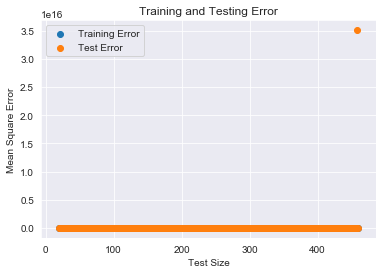

In [58]:
# Plot Training and Testing Error
plt.scatter(t_sizes, train_err, label="Training Error")
plt.scatter(t_sizes, test_err, label="Test Error")
plt.title("Training and Testing Error")
plt.xlabel("Test Size")
plt.ylabel("Mean Square Error")
plt.legend()

The graphs above indicate that the ideal training and testing split is between
200 to 300 test size range to avoid having a wide range of mean square error.

# King County Temporary Housing Project for Homeless People During Covid-19 Pandamic

There are about 12,500 homeless in Seatle King County, Washington (data from Wikipedia). Covid-19 outbreak is at its height in the united States. On April 1, an outbreak was detected in 3 different homeless shelters. Testing confirmed Covid-19 in 43 people at those sites. Dispite the initial effort to improve the shelter conditions through new implimentations such as placing sleeping mat >= 6 feet apart, have alcohol-based hand sanitizer on-site and providing masks to people, there is still high risk of spreading diseases among the residents as well as staff members. In an effort to stop Covid-19 from spreading at the shelters, the county concils met and decided to provide shelter residents safer living conditions. The county is providing 5000 new homes for the shelter residents prioritzed families with kids and older residents. 

Due to the ongoing pandamic, the county had to act fast. The best solution is to find available and effordable homes for the shelter residents. The projection for temporary housing is until May 2021. The county analyzed data from kc_house_data.csv to determine what are the criteria for sheter residents' new homes and estimate the budget required for this project.

Note: Ideally, the data needed for the project should be rental prices. However, with the sale prices data, the county can still have a good idea where to find new homes for the residents.

The following strategy is used to locate the target homes:
1. Filter out any house > $500,000
2. Among them, keep houses that are < 75% by sq. living 
4. Finally, remove houses that have more than 5 bedrooms

## Locate Homes by Zip Code and Sale Price

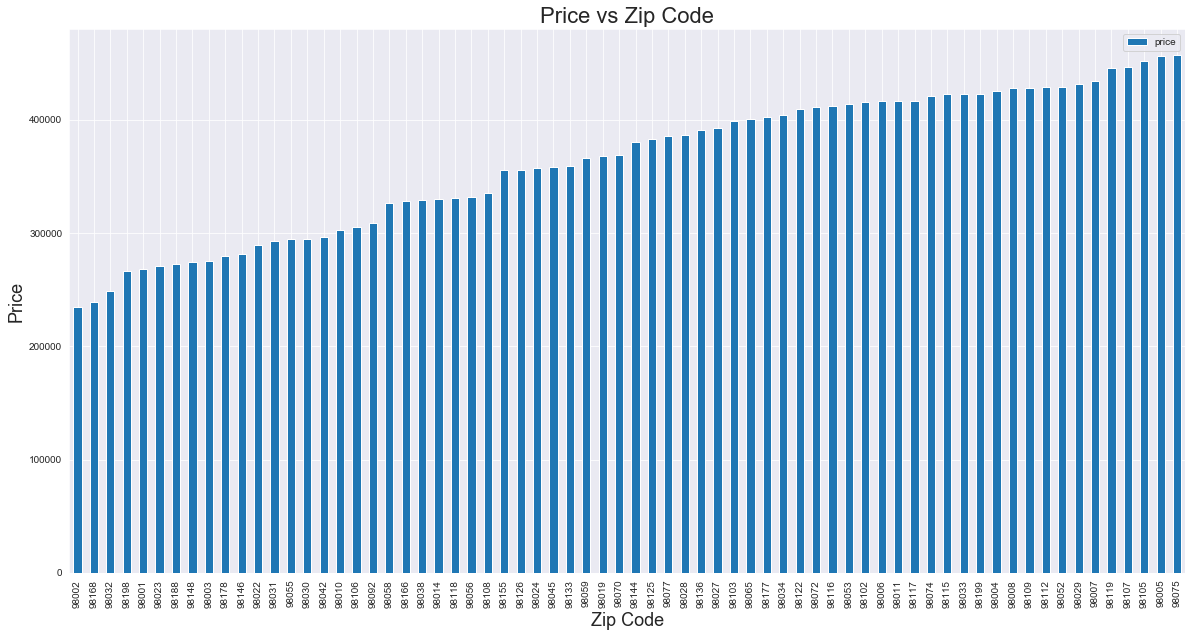

In [83]:
# Select zip codes with home price =< $500,000
df_500K = df[(df['price'] < 500000)]

df_zipcode = df_500K.groupby('zipcode').mean()

plt.figure(figsize = (20, 10))

df_zipcode['price'].sort_values().plot(kind='bar')
plt.xlabel("Zip Code", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.title("Price vs Zip Code", fontsize=22)
plt.legend(fancybox = True)

From the plot above, there are many houses that are under 500,000 dollars. A home value with $500,000 or less means more home can be prodived for residents. The plot also include zipcodes for the county to decide which area to target.

## Locate Homes by Square Feet Living

In [60]:
df_500K = df[(df['price'] < 500000)]


[Text(0.5, 0, 'Price ($)')]

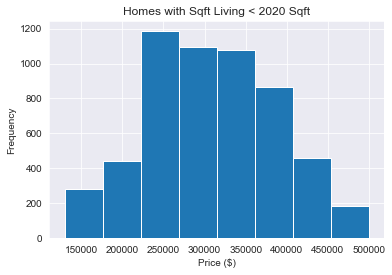

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot

df_new = df_500K[df_500K['sqft_living'] < 2020]

plot = df_new.loc[df_500K['sqft_living']]['price'].plot(
    kind='hist', bins=8,
    title='Homes with Sqft Living < 2020 Sqft')
plot.set(xlabel="Price ($)")

## Locate Homes by Number of Bedrooms

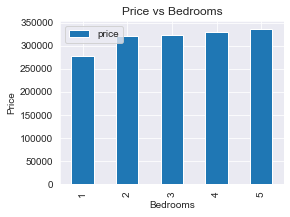

In [62]:
df_new2 = df_new[df_new['bedrooms'] < 6]

df_bedrooms = df_new2.groupby('bedrooms').mean()

plt.figure(figsize = (4, 3))

df_bedrooms['price'].sort_values().plot(kind='bar')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
plt.legend(fancybox = True)

## Locate Homes by Conditions

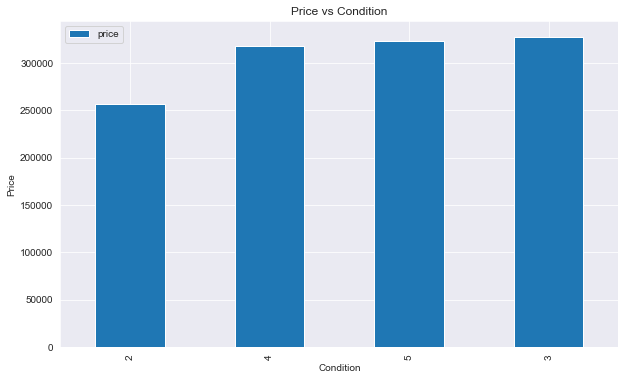

In [63]:
# Price vs conditions
df_new3 = df_new2[df_new2['condition']>1]

df_condition = df_new3.groupby('condition').mean()

plt.figure(figsize = (10, 6))

df_condition['price'].sort_values().plot(kind='bar')
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs Condition")
plt.legend(fancybox = True)

In [64]:
df_new3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [65]:
zipcode_list = (df_new3['zipcode']).unique()

# King County Map

In [66]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


Seatle_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')
Seatle_map

No handles with labels found to put in legend.


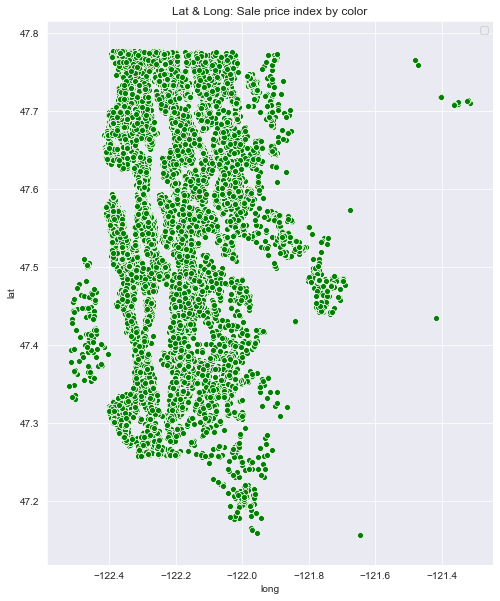

In [67]:
plt.figure(figsize = (8, 10))
sns.scatterplot(x=df['long'], y=df['lat'], color='g')
plt.title("Lat & Long: Sale price index by color")
plt.legend(fancybox = True)

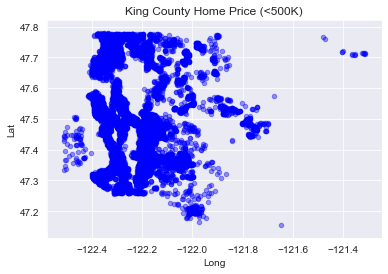

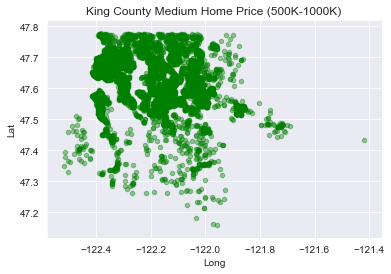

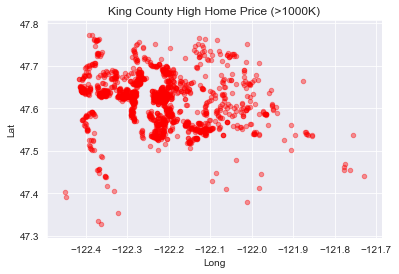

In [68]:
low = 500000
high = 1000000
def color(price):
    if price < low:
        return "blue"
    elif price < high:
        return "green"
    else:
        return "red"
colors = df['price'].apply(color)



df_low = df[df['price'] < low]
df_med = df[((df['price'] >= low) & (df['price'] < high))]
df_high = df[df['price']>= high]

a1=df_low.plot(kind='scatter', x='long', y='lat', c='blue', alpha=0.4)
plt.xlabel("Long")
plt.ylabel("Lat")
plt.title("King County Home Price (<500K)")
a2=df_med.plot(kind='scatter', x='long', y='lat', c='green', alpha=0.4)
plt.xlabel("Long")
plt.ylabel("Lat")
plt.title("King County Medium Home Price (500K-1000K)")
a3=df_high.plot(kind='scatter', x='long', y='lat', c='red', alpha=0.4)
plt.xlabel("Long")
plt.ylabel("Lat")
plt.title("King County High Home Price (>1000K)")

plt.show()

Text(0.5, 1.0, 'King County House Price')

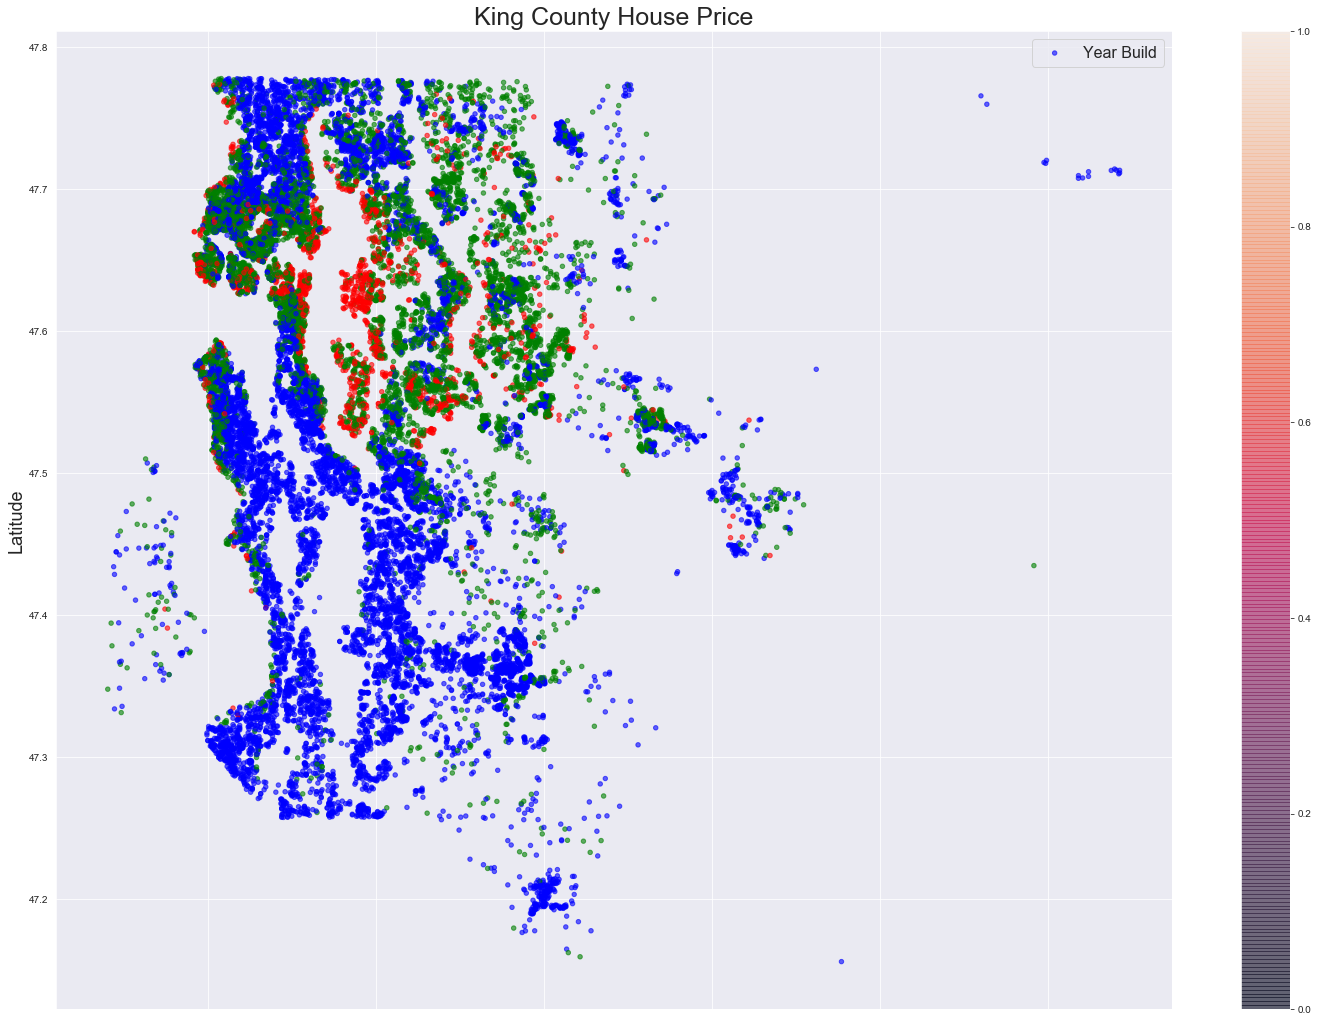

In [69]:
# King County map with price

map_plot = df_dummies.plot(kind="scatter", x='long', y='lat', alpha=0.6,\
                          s=df_dummies['yr_built']/100, label="Year Build",\
                          c=df_dummies['price'].apply(color),\
                        colormap='viridis'\
                           , figsize=(25,18))

# Blue="<500K", Green="500K-1000K", Red=">1000K"
plt.legend(fontsize=16)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Longtitude", fontsize=18)
plt.title("King County House Price",fontsize=25)

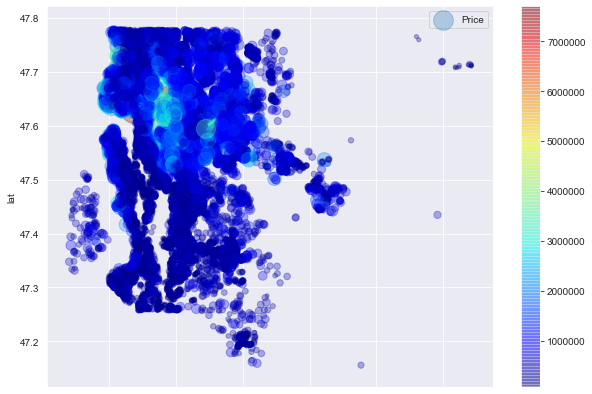

In [70]:
#graph map with price
df.plot(kind='scatter', x='long', y='lat', alpha=0.3,
         s=df['price']/10000, label='Price',   # set symbol size on population
         c=df['price'],                  #  set symbol color on house value    
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,7))
plt.legend()

# Conclusion

The areas that I narrow down to find homes for the sheltor residents that have:
    
    -price below $500000
    
    -Condition ranges 2-5
    
    -Up to 5 bedrooms in the house 
    
    -Home with sq ft living up to 2020 sq. ft.


In [71]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


Seatle_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')

Seatle_map

In [72]:
df_new4 = df_new3.sample(n=50, random_state=1)

In [73]:
df_new4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2676,8857320260,11/5/2014,462000.0,3,2.75,1890,2614,2.0,NaN,0.0,...,9,1890,0.0,1979,0.0,98008,47.6102,-122.114,1800,2769
4144,9358002305,3/13/2015,430000.0,2,1.00,950,6426,1.0,NaN,0.0,...,7,950,0.0,1949,0.0,98126,47.5653,-122.370,1360,2550
7003,7751800080,1/27/2015,465000.0,3,1.50,1460,9879,1.0,0.0,0.0,...,7,1460,0.0,1956,0.0,98008,47.6346,-122.127,1610,10050
15992,9265700005,8/22/2014,395000.0,3,1.75,1740,6220,1.0,0.0,0.0,...,6,1740,0.0,1954,0.0,98177,47.7620,-122.362,1630,8418
13441,6791100410,9/19/2014,432000.0,3,2.50,1660,15000,1.0,NaN,0.0,...,7,1660,0.0,1970,0.0,98075,47.5803,-122.050,2060,15015
15162,3223059217,11/4/2014,225000.0,2,1.00,940,15000,1.0,0.0,0.0,...,7,940,0.0,1960,0.0,98055,47.4312,-122.195,1450,15000
13707,6608500220,12/24/2014,410000.0,3,1.75,1340,9975,1.0,0.0,0.0,...,7,1340,0.0,1961,0.0,98033,47.7012,-122.169,1340,10050
15374,3395800305,6/5/2014,270000.0,3,1.50,1890,9450,1.0,0.0,0.0,...,7,1090,800.0,1957,0.0,98146,47.4829,-122.341,1470,8100
19648,9188200505,7/10/2014,275000.0,4,2.50,1830,3868,2.0,0.0,0.0,...,7,1830,0.0,2007,NaN,98118,47.5186,-122.276,2330,3868
15847,7789000235,4/9/2015,286000.0,3,1.00,950,8400,1.0,0.0,0.0,...,7,950,0.0,1958,0.0,98056,47.5104,-122.166,1250,8400


In [86]:
len(df_new4['zipcode'])

50

In [87]:
df_lat_long = df_new4[['lat', 'long']]


In [75]:
location = df_lat_long.values.tolist()
location_len = len(location)
location_len

50

In [80]:
for point in range(0, location_len):
    folium.Marker(location[point]).add_to(Seatle_map)
Seatle_map

THE END